In [ ]:
!wget https://www.dropbox.com/scl/fi/dimrpz01zib34i8i157fn/Downloads.zip?rlkey=5di2azhmehbuypfus9hqbmzoh&dl=0

--2023-12-06 11:28:36--  https://www.dropbox.com/scl/fi/dimrpz01zib34i8i157fn/Downloads.zip?rlkey=5di2azhmehbuypfus9hqbmzoh
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3b523c1017545aa50dfa09db7f.dl.dropboxusercontent.com/cd/0/inline/CI78VLDHGXvXMY45hPIAbaY6i1qEKicBEU5ebRyP3GtgSc36ZVo3emoWYkz_9nM_U8DYdjNlRlbtBVE03vQ9jNUF29-7pIpKsuEk1hWKM9BK73I31Jf6SNUyt8Dc30wUfc8rSRj67cjsV_4i2FqVRTrC/file# [following]
--2023-12-06 11:28:36--  https://uc3b523c1017545aa50dfa09db7f.dl.dropboxusercontent.com/cd/0/inline/CI78VLDHGXvXMY45hPIAbaY6i1qEKicBEU5ebRyP3GtgSc36ZVo3emoWYkz_9nM_U8DYdjNlRlbtBVE03vQ9jNUF29-7pIpKsuEk1hWKM9BK73I31Jf6SNUyt8Dc30wUfc8rSRj67cjsV_4i2FqVRTrC/file
Resolving uc3b523c1017545aa50dfa09db7f.dl.dropboxusercontent.com (uc3b523c1017545aa50dfa09db7f.dl.dropboxusercontent.com)... 162.125.8.15, 2620:

In [ ]:
!unzip -q Downloads.zip?rlkey=5di2azhmehbuypfus9hqbmzoh

In [ ]:
!ls

'Downloads.zip?rlkey=5di2azhmehbuypfus9hqbmzoh'   test-affiliate-rates.xlsx   test-orders.xlsx
 sample_data					  test-currency-rates.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from chardet.universaldetector import UniversalDetector
detector = UniversalDetector()
with open('test-affiliate-rates.xlsx', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()


{'encoding': None, 'confidence': 0.0, 'language': None}

In [ ]:
df_1=pd.read_excel("./test-affiliate-rates.xlsx")
df_2=pd.read_excel("./test-currency-rates.xlsx")
df_3=pd.read_excel("./test-orders.xlsx")


NameError: name 'plt' is not defined

In [ ]:
def dataframe_info(df):
    print("dataframe shape is :", df.shape)
    columns_x = df.copy()
    tmp = []

    for col in columns_x:
        ser = df[col]
        tmp.append({
            'name': ser.name,
            'dtype': str(ser.dtype),
            'n_unique': len(ser.unique()),
            'n_null': ser.isnull().sum(),
        })

    df_categ = pd.DataFrame(tmp)

    for column in df.columns:
        if len(df[column].unique()) < 5:
            print(f"Unique values for {column}: {df[column].unique()}")
        else:
            print(f"Number of unique values for {column} is greater than 5, so not displaying them.")

    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.columns[df.dtypes == 'object']

    print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
    print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

    if set(num_cols).intersection(set(df.columns)):
        display(df[num_cols].describe())

    if set(cat_cols).intersection(set(df.columns)):
        display(df[cat_cols].describe(include='object'))

    return df_categ, num_cols, cat_cols


#affiliate-rates

In [ ]:
df_1_categ ,num_1_cols,cat_1_cols =dataframe_info(df_1)
df_1_categ

dataframe shape is : (5, 6)
Unique values for Affiliate ID: [1 2 3]
Unique values for Affiliate Name: ['John' 'Mary' 'Luke']
Unique values for Start Date: ['2023-10-01T00:00:00.000000000' '2023-10-15T00:00:00.000000000'
 '2023-10-22T00:00:00.000000000']
Unique values for Processing Rate: [0.5 0.4 0.6]
Unique values for Chargeback Fee: [ 50  40  30 100]
Unique values for Refund Fee: [ 5  3 10]
We have 4 numeric columns: Affiliate ID, Processing Rate, Chargeback Fee, Refund Fee
And 1 categorical columns: Affiliate Name


,Affiliate ID,Processing Rate,Chargeback Fee,Refund Fee
count,5.00000,5.000000,5.000000,5.000000
mean,1.80000,0.500000,54.000000,5.600000
std,0.83666,0.070711,27.018512,2.607681
min,1.00000,0.400000,30.000000,3.000000
25%,1.00000,0.500000,40.000000,5.000000
50%,2.00000,0.500000,50.000000,5.000000
75%,2.00000,0.500000,50.000000,5.000000
max,3.00000,0.600000,100.000000,10.000000


,Affiliate Name
count,5
unique,3
top,John
freq,2


,name,dtype,n_unique,n_null
0,Affiliate ID,int64,3,0
1,Affiliate Name,object,3,0
2,Start Date,datetime64[ns],3,0
3,Processing Rate,float64,3,0
4,Chargeback Fee,int64,4,0
5,Refund Fee,int64,3,0


#currency-rates

In [ ]:
df_2_categ ,num_2_cols,cat_2_cols =dataframe_info(df_2)
df_2_categ

dataframe shape is : (42, 3)
Number of unique values for date is greater than 5, so not displaying them.
Number of unique values for USD is greater than 5, so not displaying them.
Number of unique values for GBP is greater than 5, so not displaying them.
We have 2 numeric columns: USD, GBP
And 0 categorical columns: 


,USD,GBP
count,42.000000,42.000000
mean,1.064142,0.874640
std,0.007433,0.009564
min,1.050247,0.860485
25%,1.058846,0.867549
50%,1.064507,0.870885
75%,1.069106,0.883438
max,1.079244,0.889801


,name,dtype,n_unique,n_null
0,date,datetime64[ns],42,0
1,USD,float64,42,0
2,GBP,float64,42,0


#orders

In [ ]:
df_3_categ ,num_3_cols,cat_3_cols =dataframe_info(df_3)
df_3_categ

dataframe shape is : (501, 6)
Number of unique values for Order Number is greater than 5, so not displaying them.
Number of unique values for Order Date is greater than 5, so not displaying them.
Unique values for Order Amount: [200  50 100]
Unique values for Order Status: ['Refunded' 'Chargeback' 'Completed']
Unique values for Currency: ['GBP' 'EUR' 'USD' 'EURO']
Number of unique values for Affiliate ID is greater than 5, so not displaying them.
We have 2 numeric columns: Order Number, Order Amount
And 3 categorical columns: Order Status, Currency, Affiliate ID


,Order Number,Order Amount
count,501.000000,501.000000
mean,51119.073852,117.764471
std,28216.522515,63.117291
min,1467.000000,50.000000
25%,27282.000000,50.000000
50%,50699.000000,100.000000
75%,76697.000000,200.000000
max,99814.000000,200.000000


,Order Status,Currency,Affiliate ID
count,501,501,479
unique,3,4,4
top,Completed,EUR,1
freq,176,248,254


,name,dtype,n_unique,n_null
0,Order Number,int64,500,0
1,Order Date,datetime64[ns],42,0
2,Order Amount,int64,3,0
3,Order Status,object,3,0
4,Currency,object,4,0
5,Affiliate ID,object,5,22


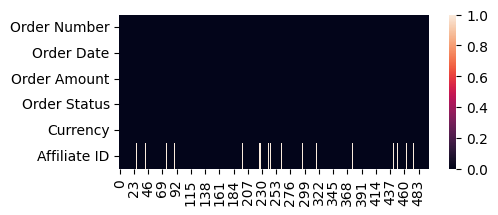

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,2))
sns.heatmap(df_3.isna().transpose());

In [ ]:
df_3.loc[23:27]

,Order Number,Order Date,Order Amount,Order Status,Currency,Affiliate ID
23,33555,2023-10-10,200,Completed,USD,2
24,24758,2023-10-30,50,Completed,USD,3
25,34398,2023-10-15,100,Completed,EUR,3
26,50216,2023-10-20,100,Refunded,GBP,2
27,84418,2023-11-02,100,Completed,EUR,NaN


#duplicates

In [ ]:
df_3.shape

(501, 6)

In [ ]:
def duplicates(data : pd.DataFrame) -> pd.DataFrame:
  print('old shape is' ,data.shape)
  if data.duplicated().any() == True:
    #check for duplicate rows based on all columns
    duplicates_all_columns = data[data.duplicated()]
    display(duplicates_all_columns)
    #To count the number of duplicates
    num_duplicates = data.duplicated().sum()
    print("duplicated values are : " ,num_duplicates)

    data.drop_duplicates( keep='first',inplace=True)
  print("new shape is : ")
  display(data.shape)

  return data


In [ ]:
df_3=duplicates(df_3)
df_3.head(2)

old shape is (501, 6)


,Order Number,Order Date,Order Amount,Order Status,Currency,Affiliate ID
500,88520,2023-10-01,100,Chargeback,USD,3


duplicated values are :  1
new shape is : 


(500, 6)

,Order Number,Order Date,Order Amount,Order Status,Currency,Affiliate ID
0,43295,2023-10-07,200,Refunded,GBP,2
1,60589,2023-10-27,50,Chargeback,EUR,3


In [ ]:
df_2=duplicates(df_2)
df_2.head(2)

old shape is (42, 3)
new shape is : 


(42, 3)

,date,USD,GBP
0,2023-10-01,1.062769,0.865057
1,2023-10-02,1.061636,0.888174


In [ ]:
df_1=duplicates(df_1)
df_1.head(2)

old shape is (5, 6)
new shape is : 


(5, 6)

,Affiliate ID,Affiliate Name,Start Date,Processing Rate,Chargeback Fee,Refund Fee
0,1,John,2023-10-01,0.5,50,5
1,1,John,2023-10-15,0.4,40,5


In [ ]:

import json #
json_filename_3 = 'df_3.json'
json_filename_2 = 'df_2.json'
json_filename_1 = 'df_1.json'
df_3.to_json(json_filename_3,orient='records', lines=True)
df_2.to_json(json_filename_2,orient='records', lines=True)
df_1.to_json(json_filename_1,orient='records', lines=True)

#2. Convert “Order Amount” into EUR applying provided currency rates

In [ ]:
# Create a dictionary to map old column names to new column names

column_mapping = {'Order Date': 'date'}

# Use the rename method to change column names
new_df=df_3.rename(columns=column_mapping)
new_df.tail(1)

,Order Number,date,Order Amount,Order Status,Currency,Affiliate ID
499,52590,2023-10-06,100,Chargeback,EUR,2


In [ ]:
merge_df=pd.merge(df_2,new_df ,on=['date'], how='inner')
display(merge_df.shape)
merge_df.head(7)


(500, 8)

,date,USD,GBP,Order Number,Order Amount,Order Status,Currency,Affiliate ID
0,2023-10-01,1.062769,0.865057,58925,100,Chargeback,USD,1
1,2023-10-01,1.062769,0.865057,96591,200,Chargeback,USD,1
2,2023-10-01,1.062769,0.865057,49928,50,Completed,USD,1
3,2023-10-01,1.062769,0.865057,50679,50,Completed,USD,2
4,2023-10-01,1.062769,0.865057,44386,200,Completed,GBP,1
5,2023-10-01,1.062769,0.865057,69093,50,Chargeback,USD,2
6,2023-10-01,1.062769,0.865057,85218,50,Chargeback,EUR,NaN


In [ ]:
df_3["Currency"].unique()

array(['GBP', 'EUR', 'USD', 'EURO'], dtype=object)

In [ ]:
def convert_to_eur(row):
    if row['Currency'] in ['GBP', 'USD']:
        return row['Order Amount'] / row[row['Currency']]
    else:
        return row['Order Amount']


# Apply the function to create a new column 'Order Amount in EUR'
merge_df['Order Amount in EUR'] = merge_df.apply(convert_to_eur,axis=1)

In [ ]:
# Display the resulting DataFrame
display(merge_df.head(7))



,date,USD,GBP,Order Number,Order Amount,Order Status,Currency,Affiliate ID,Order Amount in EUR
0,2023-10-01,1.062769,0.865057,58925,100,Chargeback,USD,1,94.093850
1,2023-10-01,1.062769,0.865057,96591,200,Chargeback,USD,1,188.187701
2,2023-10-01,1.062769,0.865057,49928,50,Completed,USD,1,47.046925
3,2023-10-01,1.062769,0.865057,50679,50,Completed,USD,2,47.046925
4,2023-10-01,1.062769,0.865057,44386,200,Completed,GBP,1,231.198592
5,2023-10-01,1.062769,0.865057,69093,50,Chargeback,USD,2,47.046925
6,2023-10-01,1.062769,0.865057,85218,50,Chargeback,EUR,NaN,50.000000


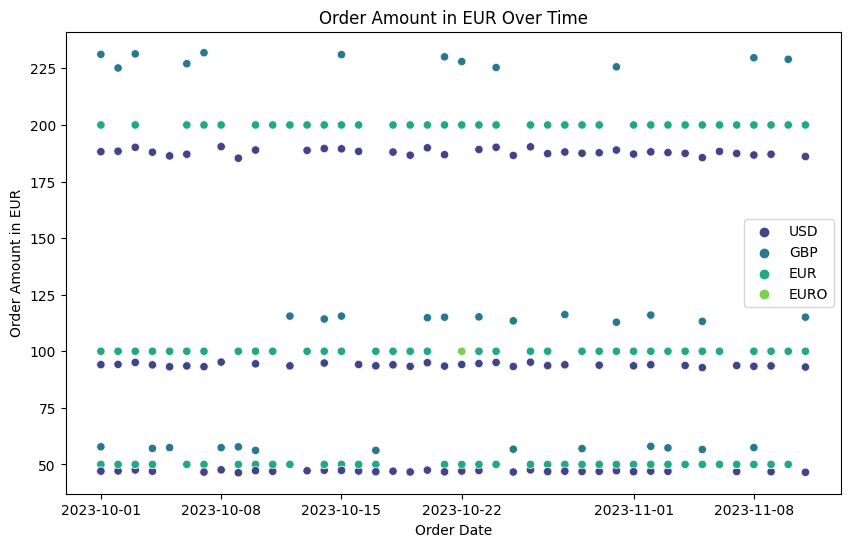

In [ ]:
#Plotting the converted Order Amount in EUR over time
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pd.to_datetime(merge_df['date'], unit='ms'),
                y=merge_df['Order Amount in EUR'],
                hue=merge_df['Currency'],
                palette='viridis')
plt.title('Order Amount in EUR Over Time')
plt.xlabel('Order Date')
plt.ylabel('Order Amount in EUR')
plt.legend()
plt.show()

# Calculate fees for each order using appropriate affiliate rates (details below)
 For each affiliate, generate a weekly aggregation and save an excel report
({affiliate_name}.xlsx) that contains the following columns:

a. Week (format: 01-10-2023 - 07-10-2023, week start day: Sunday)

b. Number of Orders

c. Total Order Amount (EUR)

d. Total Processing Fee

e. Total Refund Fee

f. Total Chargeback Fee bold text

Fee formulas:
1. Processing Fee = Order Amount (EUR) * Processing Rate. Applied to all transactions.
2. Refund Fee = Refund Fee. Applied to orders with Order Status = ‘Refunded’.
3. Chargeback Fee = Chargeback Fee. Applied to orders with Order Status = ‘Chargeback’.


Please note: each affiliate rate setup is applied from start date up to:
1. The start date (not including) of the chronologically next setup for the same affiliate
2. Or if there is no next setup, up to and including today
We should be able to run your application on similar data and obtain correct results

In [ ]:
df_1

,Affiliate ID,Affiliate Name,Start Date,Processing Rate,Chargeback Fee,Refund Fee
0,1,John,2023-10-01,0.5,50,5
1,1,John,2023-10-15,0.4,40,5
2,2,Mary,2023-10-01,0.5,50,5
3,3,Luke,2023-10-01,0.5,30,3
4,2,Mary,2023-10-22,0.6,100,10


In [ ]:
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 500 non-null    datetime64[ns]
 1   USD                  500 non-null    float64       
 2   GBP                  500 non-null    float64       
 3   Order Number         500 non-null    int64         
 4   Order Amount         500 non-null    int64         
 5   Order Status         500 non-null    object        
 6   Currency             500 non-null    object        
 7   Affiliate ID         478 non-null    object        
 8   Order Amount in EUR  500 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 39.1+ KB


In [ ]:
new_merge=pd.merge(merge_df, df_1, on="Affiliate ID", how="left")
new_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 909
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 910 non-null    datetime64[ns]
 1   USD                  910 non-null    float64       
 2   GBP                  910 non-null    float64       
 3   Order Number         910 non-null    int64         
 4   Order Amount         910 non-null    int64         
 5   Order Status         910 non-null    object        
 6   Currency             910 non-null    object        
 7   Affiliate ID         888 non-null    object        
 8   Order Amount in EUR  910 non-null    float64       
 9   Affiliate Name       885 non-null    object        
 10  Start Date           885 non-null    datetime64[ns]
 11  Processing Rate      885 non-null    float64       
 12  Chargeback Fee       885 non-null    float64       
 13  Refund Fee           885 non-null  

In [ ]:
display(new_merge.tail(2))
display(new_merge.head(2))

,date,USD,GBP,Order Number,Order Amount,Order Status,Currency,Affiliate ID,Order Amount in EUR,Affiliate Name,Start Date,Processing Rate,Chargeback Fee,Refund Fee
908,2023-11-11,1.075007,0.868981,19660,100,Completed,USD,1,93.022629,John,2023-10-01,0.5,50.0,5.0
909,2023-11-11,1.075007,0.868981,19660,100,Completed,USD,1,93.022629,John,2023-10-15,0.4,40.0,5.0


,date,USD,GBP,Order Number,Order Amount,Order Status,Currency,Affiliate ID,Order Amount in EUR,Affiliate Name,Start Date,Processing Rate,Chargeback Fee,Refund Fee
0,2023-10-01,1.062769,0.865057,58925,100,Chargeback,USD,1,94.09385,John,2023-10-01,0.5,50.0,5.0
1,2023-10-01,1.062769,0.865057,58925,100,Chargeback,USD,1,94.09385,John,2023-10-15,0.4,40.0,5.0


In [ ]:
duplicates_all_columns = new_merge[new_merge.duplicated()]
display(duplicates_all_columns)

,date,USD,GBP,Order Number,Order Amount,Order Status,Currency,Affiliate ID,Order Amount in EUR,Affiliate Name,Start Date,Processing Rate,Chargeback Fee,Refund Fee


In [ ]:
from datetime import datetime, timedelta
import calendar

# Convert 'Start Date' to datetime
new_merge['Start Date'] = pd.to_datetime(new_merge['Start Date'], unit='ms')

In [ ]:
# Define a function to calculate fees
def calculate_fees(row):
    processing_fee = row['Order Amount in EUR'] * row['Processing Rate']
    refund_fee = row['Refund Fee'] if row['Order Status'] == 'Refunded' else 0
    chargeback_fee = row['Chargeback Fee'] if row['Order Status'] == 'Chargeback' else 0
    return pd.Series([processing_fee, refund_fee, chargeback_fee], index=['Total Processing Fee', 'Total Refund Fee', 'Total Chargeback Fee'])

# Apply the function to calculate fees
fees_df = new_merge.apply(calculate_fees, axis=1)
fees_df.head(4)

,Total Processing Fee,Total Refund Fee,Total Chargeback Fee
0,47.046925,0.0,50.0
1,37.637540,0.0,40.0
2,94.093850,0.0,50.0
3,75.275080,0.0,40.0


In [ ]:
# Concatenate fees_df with merged_df
merged_df = pd.concat([new_merge, fees_df], axis=1)
display(merged_df.info())
display(merged_df.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 909
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  910 non-null    datetime64[ns]
 1   USD                   910 non-null    float64       
 2   GBP                   910 non-null    float64       
 3   Order Number          910 non-null    int64         
 4   Order Amount          910 non-null    int64         
 5   Order Status          910 non-null    object        
 6   Currency              910 non-null    object        
 7   Affiliate ID          888 non-null    object        
 8   Order Amount in EUR   910 non-null    float64       
 9   Affiliate Name        885 non-null    object        
 10  Start Date            885 non-null    datetime64[ns]
 11  Processing Rate       885 non-null    float64       
 12  Chargeback Fee        885 non-null    float64       
 13  Refund Fee          

None

,date,USD,GBP,Order Number,Order Amount,Order Status,Currency,Affiliate ID,Order Amount in EUR,Affiliate Name,Start Date,Processing Rate,Chargeback Fee,Refund Fee,Total Processing Fee,Total Refund Fee,Total Chargeback Fee
0,2023-10-01,1.062769,0.865057,58925,100,Chargeback,USD,1,94.09385,John,2023-10-01,0.5,50.0,5.0,47.046925,0.0,50.0
1,2023-10-01,1.062769,0.865057,58925,100,Chargeback,USD,1,94.09385,John,2023-10-15,0.4,40.0,5.0,37.637540,0.0,40.0


In [ ]:
# Group by affiliate and week, then aggregate data
weekly_aggregation = merged_df.groupby(['Affiliate ID',"Affiliate Name", pd.Grouper(key='date', freq='W-Sun')]).agg({
    'Order Number': 'count',
    'Order Amount in EUR': 'sum',
    'Total Processing Fee': 'sum',
    'Total Refund Fee': 'sum',
    'Total Chargeback Fee': 'sum'
}).reset_index()

# Display the resulting DataFrame
display(weekly_aggregation.head())
display(weekly_aggregation.tail())


,Affiliate ID,Affiliate Name,date,Order Number,Order Amount in EUR,Total Processing Fee,Total Refund Fee,Total Chargeback Fee
0,1,John,2023-10-01,22,2707.122684,1218.205208,0.0,540.0
1,1,John,2023-10-08,80,10253.251777,4613.963300,110.0,1350.0
2,1,John,2023-10-15,76,8977.533755,4039.890190,100.0,1350.0
3,1,John,2023-10-22,72,8482.747598,3817.236419,100.0,990.0
4,1,John,2023-10-29,96,11219.492833,5048.771775,200.0,1080.0


,Affiliate ID,Affiliate Name,date,Order Number,Order Amount in EUR,Total Processing Fee,Total Refund Fee,Total Chargeback Fee
16,3,Luke,2023-10-15,14,2003.205079,1001.602539,12.0,90.0
17,3,Luke,2023-10-22,10,821.604746,410.802373,6.0,120.0
18,3,Luke,2023-10-29,9,1046.995361,523.497680,12.0,60.0
19,3,Luke,2023-11-05,9,637.891363,318.945681,9.0,60.0
20,3,Luke,2023-11-12,7,963.822839,481.911419,0.0,60.0


In [ ]:
# Find the maximum and minimum date
max_date = weekly_aggregation['date'].max()
min_date = weekly_aggregation['date'].min()

print("Maximum Date:", max_date)
print("Minimum Date:", min_date)

Maximum Date: 2023-11-12 00:00:00
Minimum Date: 2023-10-01 00:00:00


In [ ]:
list(np.datetime_as_string(df_1['Start Date'].unique(),unit='D'))

['2023-10-01', '2023-10-15', '2023-10-22']

In [ ]:
df_1

,Affiliate ID,Affiliate Name,Start Date,Processing Rate,Chargeback Fee,Refund Fee
0,1,John,2023-10-01,0.5,50,5
1,1,John,2023-10-15,0.4,40,5
2,2,Mary,2023-10-01,0.5,50,5
3,3,Luke,2023-10-01,0.5,30,3
4,2,Mary,2023-10-22,0.6,100,10


In [ ]:
list(np.datetime_as_string(df_1['Start Date'].unique(),unit='D'))

['2023-10-01', '2023-10-15', '2023-10-22']

In [ ]:
list(np.datetime_as_string(df_1[df_1["Affiliate Name"]=='John']['Start Date'].unique(),unit='D'))

['2023-10-01', '2023-10-15']

In [ ]:
def aggregate_by_start_dates(df_main, df_rates, affiliate_name, start_dates):
    # Convert dates to datetime if they are not already
    df_main['date'] = pd.to_datetime(df_main['date'])
    df_rates['Start Date'] = pd.to_datetime(df_rates['Start Date'])

    # Initialize an empty DataFrame to store the aggregated results
    aggregated_df = pd.DataFrame()

    # Sort the start dates
    start_dates = sorted(pd.to_datetime(start_dates))

    for i in range(len(start_dates)-1):
        # Filter data for the specific affiliate and between two start dates
        filtered_data = df_main[(df_main['Affiliate Name'] == affiliate_name) &
                                (df_main['date'] >= start_dates[i]) &
                                (df_main['date'] < start_dates[i+1])]

        # Sum the required information
        aggregated_result = filtered_data[['Order Amount in EUR', 'Total Refund Fee',
                                           'Total Processing Fee','Total Chargeback Fee',
                                           'Order Number']].sum()

        # Add start date and other relevant information from the rate DataFrame
        rate_info = df_rates[(df_rates['Affiliate Name'] == affiliate_name) &
                             (df_rates['Start Date'] == start_dates[i])]
        aggregated_result['Week'] = start_dates[i].strftime('%d-%m-%Y') + ' - ' + start_dates[i+1].strftime('%d-%m-%Y')

        # Append the result to the aggregated DataFrame only if it's not all zeros
        if not aggregated_result[['Order Amount in EUR', 'Total Refund Fee',
                                  'Total Processing Fee','Total Chargeback Fee',
                                  'Order Number']].eq(0).all().all():
            aggregated_df = aggregated_df.append(aggregated_result, ignore_index=True)

    # For the last period (from the last start date until the maximum date)
    last_start_date = start_dates[-1]
    max_date = df_main['date'].max()

    # First row for the date range from the last start date to the day before the next start date
    filtered_data = df_main[(df_main['Affiliate Name'] == affiliate_name) &
                            (df_main['date'] >= last_start_date) &
                            (df_main['date'] < start_dates[-1])]
    aggregated_result = filtered_data[['Order Amount in EUR', 'Total Refund Fee',
                                       'Total Processing Fee','Total Chargeback Fee',
                                       'Order Number']].sum()
    rate_info = df_rates[(df_rates['Affiliate Name'] == affiliate_name) &
                         (df_rates['Start Date'] == last_start_date)]
    aggregated_result['Week'] = last_start_date.strftime('%d-%m-%Y') + ' - ' + start_dates[-1].strftime('%d-%m-%Y')
    # Append the result to the aggregated DataFrame only if it's not all zeros
    if not aggregated_result[['Order Amount in EUR', 'Total Refund Fee',
                              'Total Processing Fee','Total Chargeback Fee',
                              'Order Number']].eq(0).all().all():
        aggregated_df = aggregated_df.append(aggregated_result, ignore_index=True)

    # Second row for the date range from the last start date to the maximum date
    filtered_data = df_main[(df_main['Affiliate Name'] == affiliate_name) &
                            (df_main['date'] >= last_start_date)]
    aggregated_result = filtered_data[['Order Amount in EUR', 'Total Refund Fee',
                                       'Total Processing Fee','Total Chargeback Fee',
                                       'Order Number']].sum()
    rate_info = df_rates[(df_rates['Affiliate Name'] == affiliate_name) &
                         (df_rates['Start Date'] == last_start_date)]
    aggregated_result['Week'] = last_start_date.strftime('%d-%m-%Y') + ' - ' + max_date.strftime('%d-%m-%Y')
    # Append the result to the aggregated DataFrame only if it's not all zeros
    if not aggregated_result[['Order Amount in EUR', 'Total Refund Fee',
                              'Total Processing Fee','Total Chargeback Fee',
                              'Order Number']].eq(0).all().all():
        aggregated_df = aggregated_df.append(aggregated_result, ignore_index=True)

    return aggregated_df

In [ ]:
start_dates = list(np.datetime_as_string(df_1[df_1["Affiliate Name"]=='John']['Start Date'].unique(),unit='D'))
result_df_john = aggregate_by_start_dates(weekly_aggregation, df_1, 'John', start_dates)

result_df_john

,Order Amount in EUR,Total Refund Fee,Total Processing Fee,Total Chargeback Fee,Order Number,Week
0,12960.374461,110.0,5832.168507,1890.0,102.0,01-10-2023 - 15-10-2023
1,46747.662672,650.0,21036.448202,6030.0,406.0,15-10-2023 - 12-11-2023


In [ ]:
start_dates = list(np.datetime_as_string(df_1[df_1["Affiliate Name"]=='Mary']['Start Date'].unique(),unit='D'))
result_df_Mary = aggregate_by_start_dates(weekly_aggregation, df_1, 'Mary', start_dates)
result_df_Mary

,Order Amount in EUR,Total Refund Fee,Total Processing Fee,Total Chargeback Fee,Order Number,Week
0,11229.015196,240.0,6175.958358,2850.0,108.0,01-10-2023 - 22-10-2023
1,23708.255283,495.0,13039.540405,5250.0,204.0,22-10-2023 - 12-11-2023


In [ ]:
start_dates = list(np.datetime_as_string(df_1[df_1["Affiliate Name"]=='Luke']['Start Date'].unique(),unit='D'))
result_df_Luke = aggregate_by_start_dates(weekly_aggregation, df_1, 'Luke', start_dates)
result_df_Luke

,Order Amount in EUR,Total Refund Fee,Total Processing Fee,Total Chargeback Fee,Order Number,Week
0,7549.428615,48.0,3774.714308,630.0,65.0,01-10-2023 - 12-11-2023


In [ ]:
# Save an Excel report for each affiliate
#for affiliate_id, affiliate_data in weekly_aggregation.groupby('Affiliate ID'):
    #affiliate_name = merged_df.loc[merged_df['Affiliate ID'] == affiliate_id, 'Affiliate Name'].iloc[0]
    #file_name = f"{affiliate_name}.xlsx"
    #affiliate_data.to_excel(file_name, index=False)

In [ ]:
file_name_john = "john.xlsx"
result_df_john.to_excel(file_name_john, index=False)

file_name_Mary = "Mary.xlsx"
result_df_Mary.to_excel(file_name_Mary, index=False)

file_name_Luke = "Luke.xlsx"
result_df_Luke.to_excel(file_name_Luke, index=False)